# Исследований анализ данных

Занятие взято из курса [Harvard CS109: Data Science](http://cs109.org) | Подготовленно [Chris Beaumont](http://chrisbeaumont.org)<br>
 [Репозиторий с файлами курса](https://github.com/cs109/content))

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#tell pandas to display wide tables as pretty HTML tables
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks

    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)

    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')

    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

Рассмотрим этапы исследовательского анализа данных в Python. Это не универсальный пример, но он охватывает многие приемы анализа данных.

**Этапы работы**:

Постройте DataFrame из данных (в идеале поместите все данные в этот объект)
- Очистите DataFrame. Он должен обладать следующими свойствами:
    - Каждая строка описывает один объект
    - Каждый столбец описывает свойство этого объекта
    - Столбцы при необходимости имеют числовой характер
    - Столбцы содержат атомарные свойства, которые не могут быть дополнительно разложены
    - Изучите глобальные свойства. Используйте гистограммы, точечные диаграммы и функции агрегирования для суммирования данных.
- Исследуйте признаки


Вот предварительный просмотр необработанных данных, которые мы будем использовать - это список из 10 000 фильмов, снятых с 1950 года с наибольшим количеством пользовательских рейтингов IMDB. Он был выгружен около года назад со страниц, подобных этой.   [pages like this](http://www.imdb.com/search/title?sort=num_votes,desc&title_type=feature&year=1950,2012).Загрузите данные на Download the data at [http://bit.ly/cs109_imdb](http://bit.ly/cs109_imdb).

## 1. 1. Подключение фрейма данных

Текстовый файл разделен на вкладки и не имеет заголовков столбцов. Мы устанавливаем соответствующие ключевые слова для обработки этогоpd.read_csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/trisha00001/EDA/main/imdb_top_10000.txt', sep='\t')
df


,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
0,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
1,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
2,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
3,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
4,tt0109830,Forrest Gump (1994),1994,8.7,368994,142 mins.,Comedy|Drama|Romance
...,...,...,...,...,...,...,...
9994,tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
9995,tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
9996,tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller
9997,tt0152836,Taal (1999),1999,6.5,1356,179 mins.,Musical|Romance


In [3]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('https://raw.githubusercontent.com/trisha00001/EDA/main/imdb_top_10000.txt', delimiter='\t', names=names).dropna()
print ("Количество строк: %i" % data.shape[0])
data.head()  # print the first 5 rows

Количество строк: 9999


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   imdbID   9999 non-null   object 
 1   title    9999 non-null   object 
 2   year     9999 non-null   int64  
 3   score    9999 non-null   float64
 4   votes    9999 non-null   int64  
 5   runtime  9999 non-null   object 
 6   genres   9999 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 624.9+ KB


## 2.  Предобработка данных (Очистка DataFrame)
На этом этапе существует несколько проблем с DataFrame:

Столбец среды выполнения описывает число, но хранится в виде строки
Колонка жанров не атомарна - она объединяет несколько жанров вместе. Это затрудняет, например, извлечение того, какие фильмы являются комедиями.
Год фильма повторяется в заголовке и столбце года
### Исправление столбца среды выполнения
Следующий фрагмент преобразует строку, например «142 минуты», в число 142:

In [5]:
dirty = '124 mins.'
number = dirty.split()
clean = int(number[0])
print (number)
print (clean)

['124', 'mins.']
124


In [6]:
clean

124

Мы можем упаковать это в понимание списка


In [7]:
clean_runtime = [int(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller


### Разделение жанров

Мы можем использовать множества для разделения столбца жанров на множество столбцов. Каждый новый столбец будет соответствовать одному жанру, и каждая ячейка будет True или False.


In [8]:
#determine the unique genres
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)
print(genres)
print(len(genres))

['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
24


In [9]:


#make a column for each genre
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]

data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club (1999),1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix (1999),1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception (2010),2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


### Удаление года из названия
Мы можем исправить название фильма убрав год, удалив последние 7 символов.

In [10]:
data['title'] = [t[0:-7] for t in data.title]
data.head()

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,tt0137523,Fight Club,1999,8.8,458173,139,Drama|Mystery|Thriller,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,tt0133093,The Matrix,1999,8.7,448114,136,Action|Adventure|Sci-Fi,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,tt1375666,Inception,2010,8.9,385149,148,Action|Adventure|Sci-Fi|Thriller,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False


## 3. Изучите глобальные свойства¶
Далее мы рассмотрим некоторые базовые, глобальные сводки DataFrame.

### Обращение к соответствующим колонкам 'describe'

In [11]:
data.describe()

,year,score,votes,runtime
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,1993.471447,6.385989,16605.462946,103.580358
std,14.830049,1.189965,34564.883945,26.629310
min,1950.000000,1.500000,1356.000000,0.000000
25%,1986.000000,5.700000,2334.500000,93.000000
50%,1998.000000,6.600000,4981.000000,102.000000
75%,2005.000000,7.200000,15278.500000,115.000000
max,2011.000000,9.200000,619479.000000,450.000000


In [12]:
data.describe(include ='O')

,imdbID,title,genres
count,9999,9999,9999
unique,9999,9738,1643
top,tt0279977,Hamlet,Drama
freq,1,3,711


In [13]:
data.loc[data.runtime	==0]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
66,tt0457430,Pan's Labyrinth,2006,8.4,186080,0,Drama|Fantasy|Mystery,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
78,tt0081505,The Shining,1980,8.5,212988,0,Drama|Horror|Mystery,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
455,tt1077258,Planet Terror,2007,7.5,74950,0,Action|Horror|Sci-Fi,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
548,tt0075860,Close Encounters of the Third Kind,1977,7.8,65768,0,Drama|Sci-Fi,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
669,tt0054331,Spartacus,1960,8.0,55504,0,Action|Adventure|Biography|Drama|History,True,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9923,tt1042499,Filth and Wisdom,2008,5.1,1367,0,Comedy|Drama|Music|Romance,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
9964,tt0094642,American Gothic,1988,5.1,1359,0,Horror,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
9966,tt1926313,Pyaar Ka Punchnama,2011,8.0,1359,0,Comedy|Drama|Romance,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9973,tt0878674,Garage,2007,6.9,1356,0,Drama,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
data.loc[data.title	=='Possession']

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
4053,tt0256276,Possession,2002,6.4,7238,102,Romance|Drama|Mystery,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False
5863,tt0082933,Possession,1981,7.1,3648,127,Drama|Horror,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
7129,tt0368563,Possession,2009,5.6,2571,85,Drama|Romance|Thriller|Mystery,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False


In [15]:
data[['score', 'runtime']].describe()

,score,runtime
count,9999.000000,9999.000000
mean,6.385989,103.580358
std,1.189965,26.629310
min,1.500000,0.000000
25%,5.700000,93.000000
50%,6.600000,102.000000
75%,7.200000,115.000000
max,9.200000,450.000000


In [16]:
#hmmm, a runtime of 0 looks suspicious. How many movies have that?
print (len(data[data.runtime == 0]))

#probably best to flag those bad data as NAN
data[[data.runtime==0] ]= np.nan

282


/tmp/ipython-input-16-14190491.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data[[data.runtime==0] ]= np.nan
/tmp/ipython-input-16-14190491.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data[[data.runtime==0] ]= np.nan
/tmp/ipython-input-16-14190491.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data[[data.runtime==0] ]= np.nan
/tmp/ipython-input-16-14190491.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an er

In [17]:
data.runtime.describe()

,runtime
count,9717.000000
mean,106.586395
std,20.230330
min,45.000000
25%,93.000000
50%,103.000000
75%,115.000000
max,450.000000


### Визуализация

больше фильмов в последние годы, но не совсем последние фильмы (они еще не успели получить много голосов?)

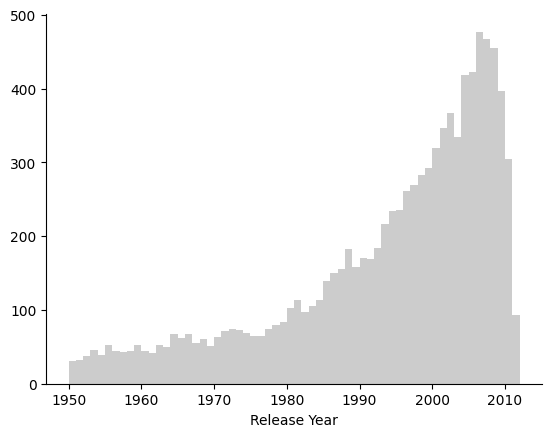

In [18]:

plt.hist(data.year, bins=np.arange(1950, 2013), color='#cccccc')
plt.xlabel("Release Year")
remove_border()

**Наблюдается рост выпуска фильмов**

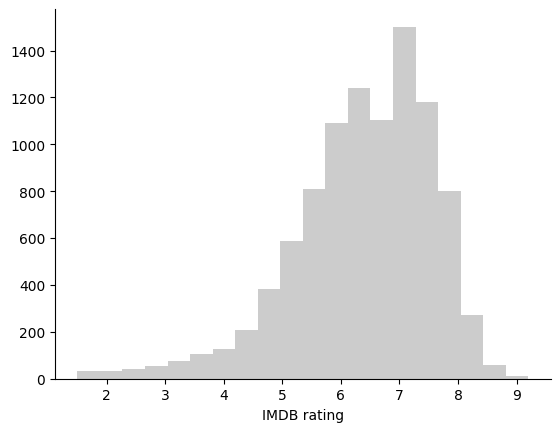

In [19]:
plt.hist(data.score, bins=20, color='#cccccc')
plt.xlabel("IMDB rating")
remove_border()

**Изменение рейтига от 1 до 9,5. Оснавная часть фильмов от 6 до 7**

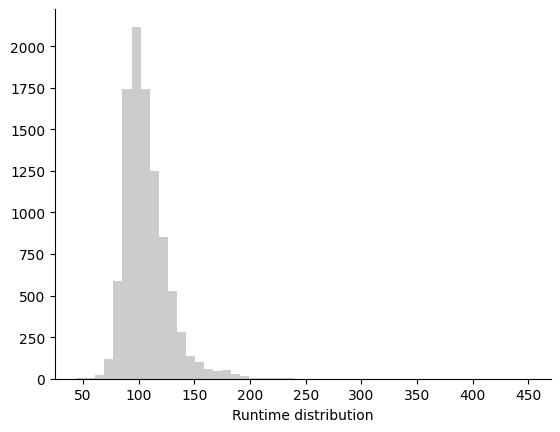

In [20]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")
remove_border()

**Фильмы идут от часа, до 2, 5 часа**

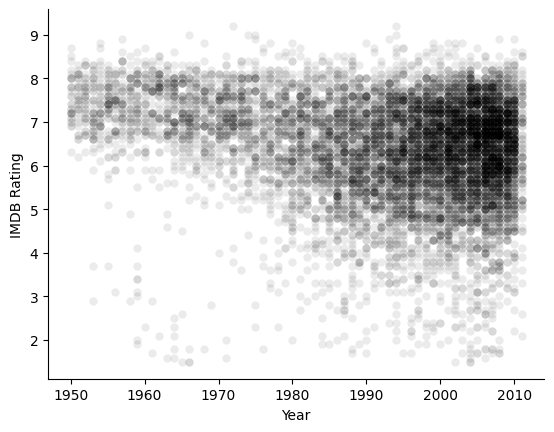

In [21]:
#hmm, more bad, recent movies. Real, or a selection bias?

plt.scatter(data.year, data.score, lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
remove_border()

**Самые первые фильмы оценивались выше, чем современные. Качество фильмов падает.**

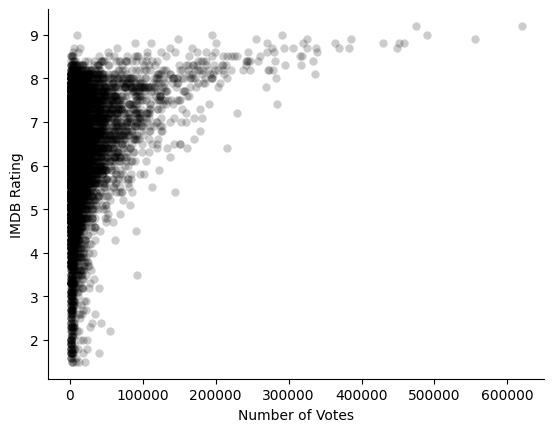

In [22]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")

remove_border()

**Больше всего смотрят фильмы с высоким рейтингом**

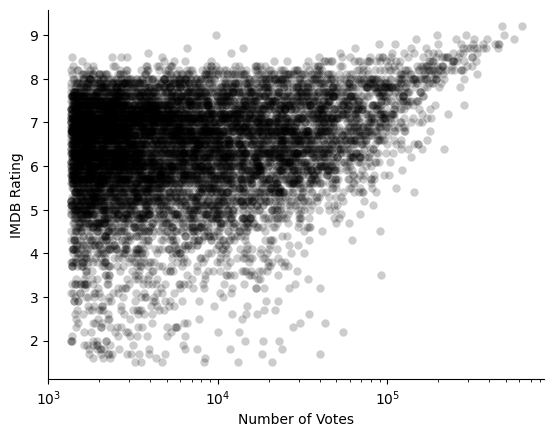

In [23]:
plt.scatter(data.votes, data.score, lw=0, alpha=.2, color='k')
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

Основные выводы:
- ранние фильмы были оценены выше, чем более поздние;
- фильмы с большим количеством просмотров имееют более высокий рейтинг.


### Определение некоторых особенности

In [24]:
# low-score movies with lots of votes
data[(data.votes > 9e4) & (data.score < 5)][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
317,New Moon,2009.0,4.5,90457.0,Adventure|Drama|Fantasy|Romance
334,Batman & Robin,1997.0,3.5,91875.0,Action|Crime|Fantasy|Sci-Fi


In [25]:
# The lowest rated movies
data[data.score == data.score.min()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
1982,Manos: The Hands of Fate,1966.0,1.5,20927.0,Horror
2793,Superbabies: Baby Geniuses 2,2004.0,1.5,13196.0,Comedy|Family
3746,Daniel the Wizard,2004.0,1.5,8271.0,Comedy|Crime|Family|Fantasy|Horror
5158,Ben & Arthur,2002.0,1.5,4675.0,Drama|Romance
5993,Night Train to Mundo Fine,1966.0,1.5,3542.0,Action|Adventure|Crime|War
6257,Monster a-Go Go,1965.0,1.5,3255.0,Sci-Fi|Horror


In [26]:
# The highest rated movies
data[data.score == data.score.max()][['title', 'year', 'score', 'votes', 'genres']]

,title,year,score,votes,genres
0,The Shawshank Redemption,1994.0,9.2,619479.0,Crime|Drama
26,The Godfather,1972.0,9.2,474189.0,Crime|Drama


### Выполнение функций агрегирования, например для нескольких строк или столбцов

*Какие жанры являются наиболее частыми?*

In [27]:
#sum sums over rows by default
genre_count = np.sort(data[genres].sum())[::-1]
gg=pd.DataFrame({'Genre Count': genre_count})
print(gg)
print(len(gg))

   Genre Count
0         5527
1         3807
2         2758
3         2369
4         1832
5         1813
6         1281
7         1173
8          987
9          902
10         874
11         746
12         496
13         387
14         365
15         348
16         306
17         283
18         248
19         231
20          40
21           9
22           1
23           1
24


In [28]:
#sum sums over rows by default
genre_count = data[genres].sum()[::-1]
gg=pd.DataFrame({'Genre Count': genre_count})
print(gg)
print(len(gg))

           Genre Count
Western            231
War                496
Thriller          2758
Sport              283
Sci-Fi             874
Romance           2369
Reality-TV           1
News                 1
Mystery            987
Musical            248
Music              365
Horror            1173
History            348
Film-Noir           40
Fantasy            902
Family             746
Drama             5527
Crime             1813
Comedy            3807
Biography          387
Animation          306
Adventure         1281
Adult                9
Action            1832
24


In [29]:
data.Action.value_counts()

,count
Action,
False,7885
True,1832


In [30]:
data.Drama.value_counts()

,count
Drama,
True,5527
False,4190


*Сколько жанров в среднем у фильма?*

In [31]:
#axis=1 sums over columns instead
genre_count = data[genres].sum(axis=1)
print ("Average movie has %0.2f genres" % genre_count.mean())
genre_count.describe()

Average movie has 2.68 genres


,0
count,9999
unique,9
top,3
freq,3016


## Укрупним данные по  группам
Давайте разделим фильмы по десятилетиям

In [32]:
decade =  (data.year // 10) * 10

tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head()

/tmp/ipython-input-32-3039315050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tyd['decade'] = decade


,title,year,decade
0,The Shawshank Redemption,1994.0,1990.0
1,Pulp Fiction,1994.0,1990.0
2,Fight Club,1999.0,1990.0
3,The Matrix,1999.0,1990.0
4,Inception,2010.0,2010.0


[GroupBy](http://pandas.pydata.org/pandas-docs/dev/groupby.html) GroupBy соберет фильмы в группы с равными значениями десятилетия

year
1950.0    7.248456
1960.0    7.063521
1970.0    6.815642
1980.0    6.248289
1990.0    6.197537
2000.0    6.280190
2010.0    6.344081
Name: Decade Mean, dtype: float64


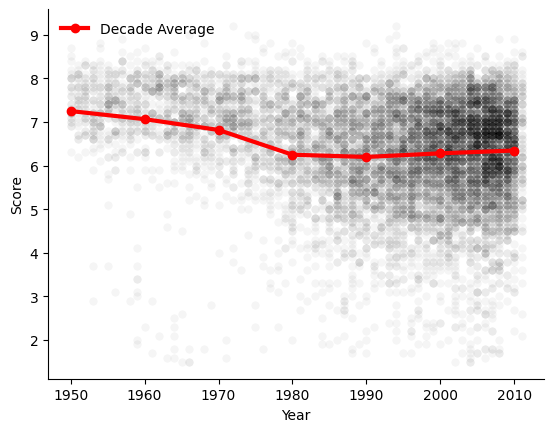

In [33]:
#mean score for all movies in each decade
decade_mean = data.groupby(decade).score.mean()
decade_mean.name = 'Decade Mean'
print(decade_mean)

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

Рейтинг у фильмов снятых в начале зарождения кинемотографа выше, чем у современных фильмов.

Мы можем пойти еще дальше и вычислить разброс в каждом году.(построить границу)

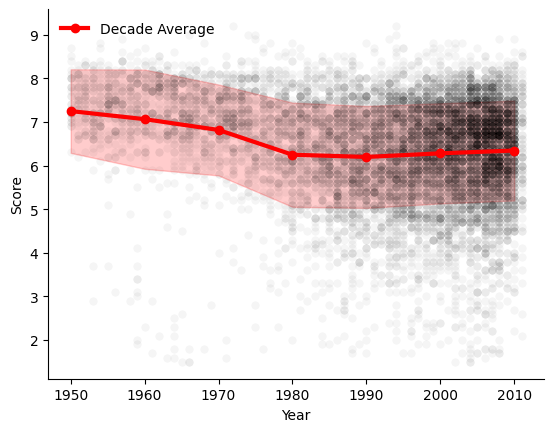

In [34]:
grouped_scores = data.groupby(decade).score

mean = grouped_scores.mean()
std = grouped_scores.std()

plt.plot(decade_mean.index, decade_mean.values, 'o-',
        color='r', lw=3, label='Decade Average')
plt.fill_between(decade_mean.index, (decade_mean + std).values,
                 (decade_mean - std).values, color='r', alpha=.2)
plt.scatter(data.year, data.score, alpha=.04, lw=0, color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

Найдем самый популярный фильм для каждого года:


In [35]:
for year, subset in data.groupby('year'):
    print (year, subset[subset.score == subset.score.max()].title.values)

1950.0 ['Sunset Blvd.']
1951.0 ['Strangers on a Train']
1952.0 ["Singin' in the Rain"]
1953.0 ['The Wages of Fear' 'Tokyo Story']
1954.0 ['Seven Samurai']
1955.0 ['Diabolique']
1956.0 ['The Killing']
1957.0 ['12 Angry Men']
1958.0 ['Vertigo']
1959.0 ['North by Northwest']
1960.0 ['Psycho']
1961.0 ['Yojimbo']
1962.0 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963.0 ['The Great Escape' 'High and Low']
1964.0 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965.0 ['For a Few Dollars More']
1966.0 ['The Good, the Bad and the Ugly']
1967.0 ['Cool Hand Luke']
1968.0 ['Once Upon a Time in the West']
1969.0 ['Butch Cassidy and the Sundance Kid']
1970.0 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971.0 ['A Clockwork Orange']
1972.0 ['The Godfather']
1973.0 ['The Sting' 'Scenes from a Marriage']
1974.0 ['The Godfather: Part II']
1975.0 ['Outrageous Class']
1976.0 ['Tosun Pasa']
1977.0 ['Star Wars: Episode IV - A New Hope']
1978.0 ['The Girl with the Red Scarf']
19

### Давайте разделим фильмы по жанрам и посмотрим, как они меняются в зависмилсти от их год выпуска / время выполнения / оценка IMDB.


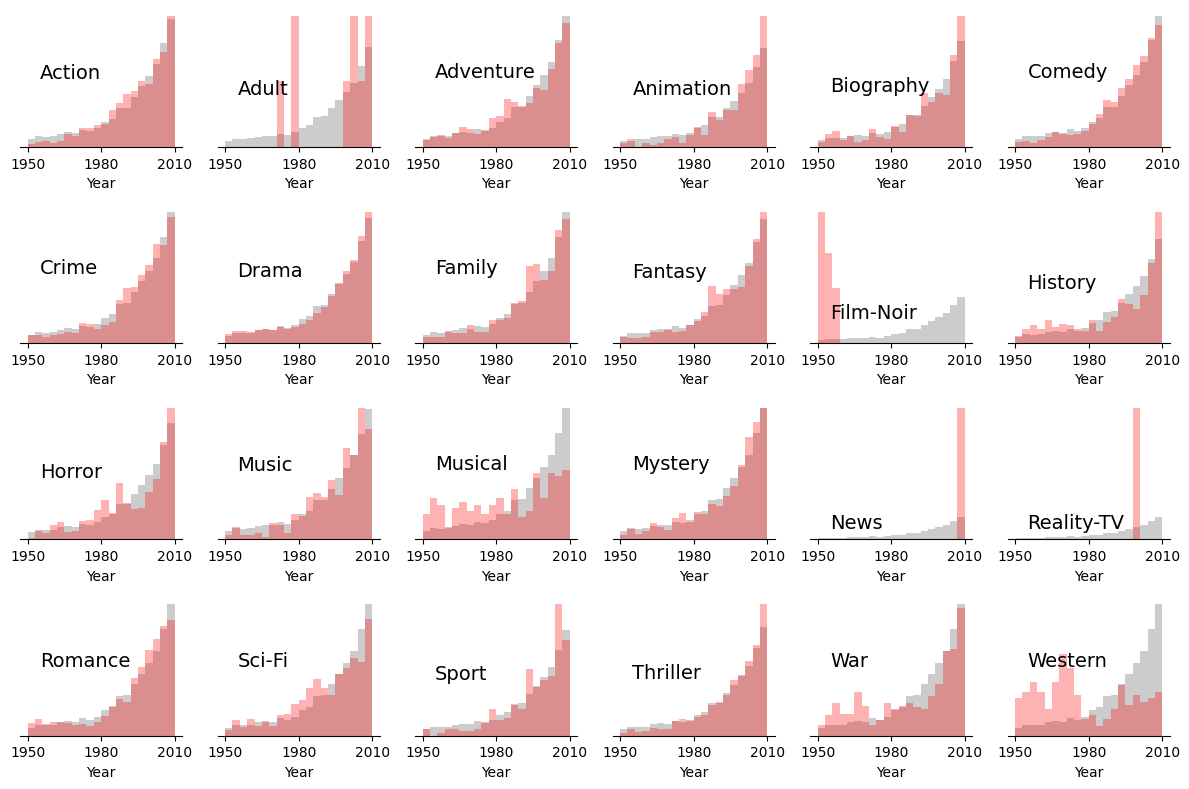

In [36]:
#create a 4x6 grid of plots.
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8) , tight_layout=True        )

bins = np.arange(1950, 2013, 3)
for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].year,
            bins=bins, histtype='stepfilled', density=True, color='r', alpha=.3, ec='none')

    ax.hist(data.year, bins=bins, histtype='stepfilled', ec='None', density=True, zorder=0, color='#cccccc')

    ax.annotate(genre, xy=(1955, 3e-2), fontsize=14)
    ax.xaxis.set_ticks(np.arange(1950, 2013, 30))
    ax.set_yticks([])
    remove_border(ax, left=False)
    ax.set_xlabel('Year')

Некоторые более тонкие закономерности здесь:

1. Вестерны и мюзиклы имеют неравномерный уровень распространения
2. Фильмы нуар были гораздо популярнее в 50-х и 60-х годах.
3. Новости  и реалити шоу после 2000.

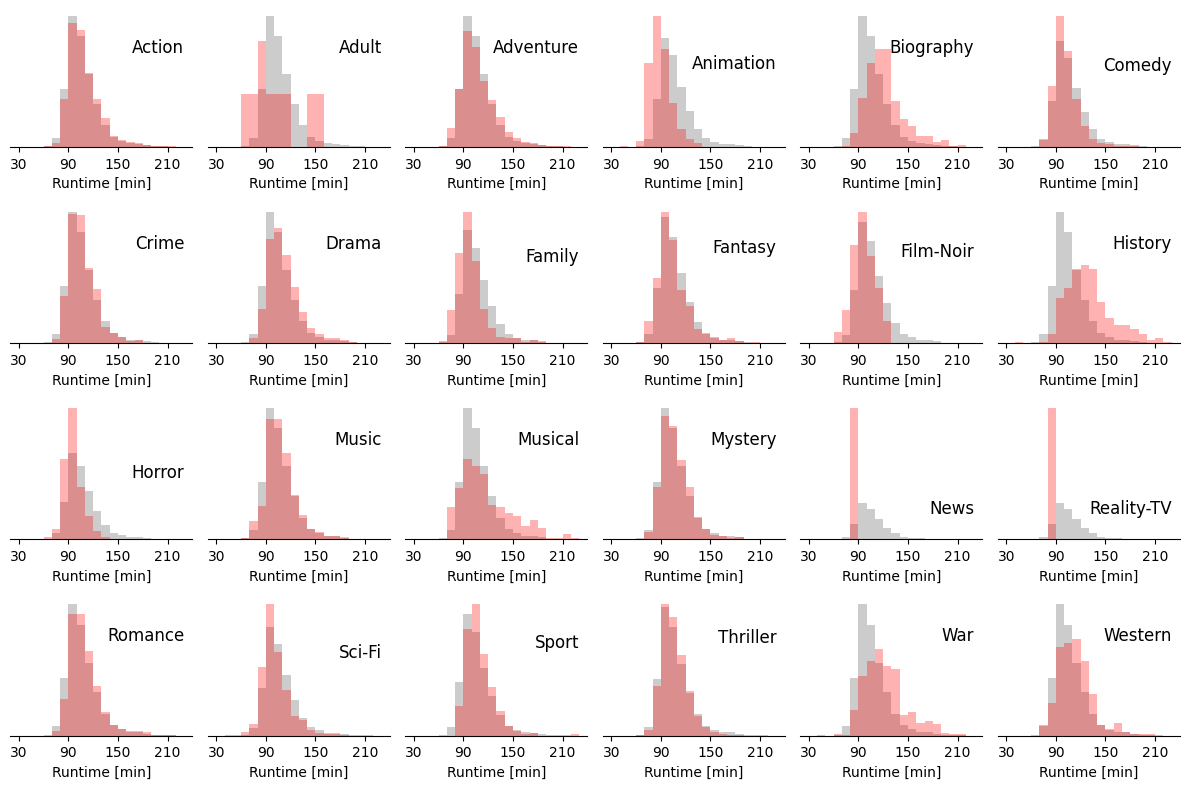

In [37]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(30, 240, 10)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].runtime,
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3, density=True,)

    ax.hist(data.runtime, bins=bins, density=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)

    ax.set_xticks(np.arange(30, 240, 60))
    ax.set_yticks([])
    ax.set_xlabel("Runtime [min]")
    remove_border(ax, left=False)
    ax.annotate(genre, xy=(230, .02), ha='right', fontsize=12)

In [38]:
data[data.Adult==True]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
2429,tt0080491,Caligula,1979.0,4.9,16008.0,156.0,Adult|Drama|History,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2661,tt0209077,Ken Park,2002.0,5.9,13971.0,96.0,Adult|Drama,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4263,tt1273235,A Serbian Film,2010.0,5.8,6598.0,104.0,Adult|Drama|Horror|Thriller,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False
4877,tt0256103,Intimacy,2001.0,6.3,5250.0,119.0,Adult|Drama|Romance,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4950,tt0194314,Romance,1999.0,5.3,5070.0,84.0,Adult|Drama|Romance,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
6169,tt0068468,Deep Throat,1972.0,5.2,3333.0,61.0,Adult|Comedy,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7956,tt0348529,Anatomie de l'enfer,2004.0,4.3,2093.0,77.0,Adult|Drama,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8018,tt0459102,Import/Export,2007.0,7.0,2059.0,141.0,Adult|Drama,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9268,tt0077415,Debbie Does Dallas,1978.0,5.5,1563.0,80.0,Adult|Comedy,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


1. Биографии и исторические фильмы длиннее
2. Анимационные фильмы короче
3. Фильмы Фильм-нуар имеют то же среднее значение, но более концентрированы около 100-минутного хронометража
4. Мюзиклы имеют такое же среднее значение, но большую дисперсию во времени исполнения

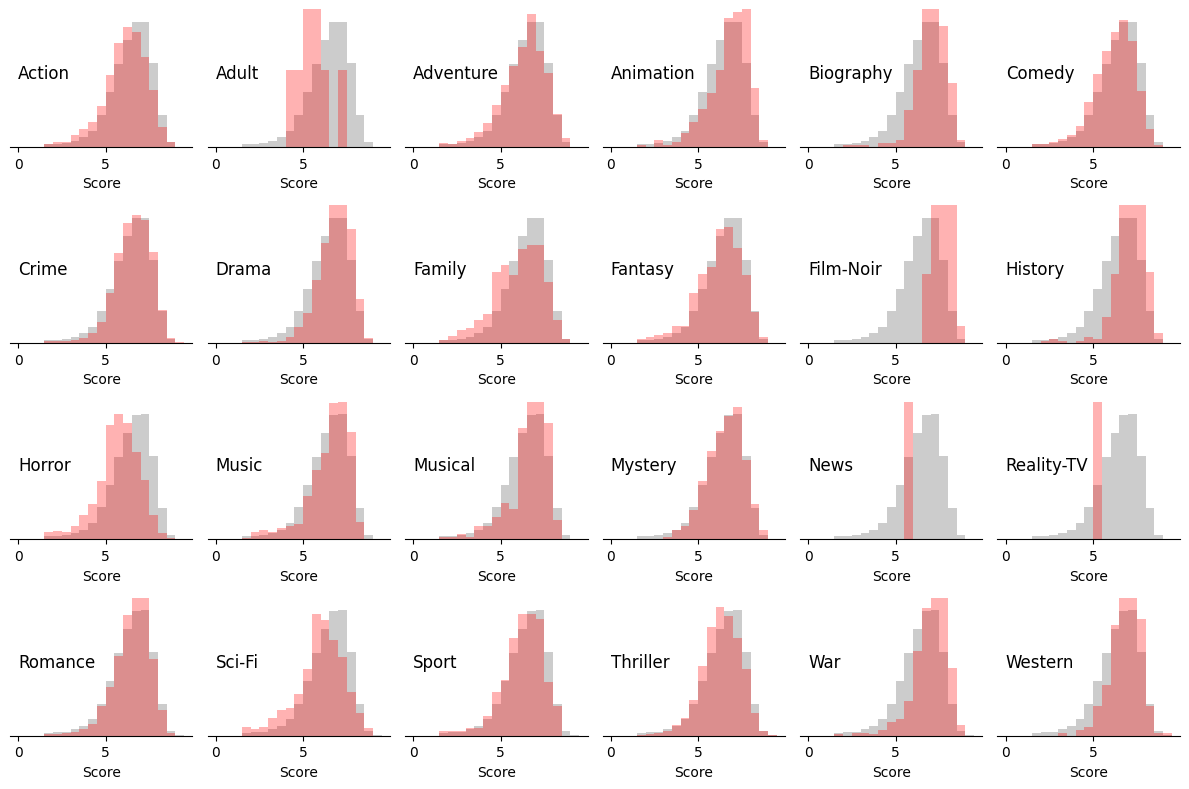

In [39]:
fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(12, 8), tight_layout=True)

bins = np.arange(0, 10, .5)

for ax, genre in zip(axes.ravel(), genres):
    ax.hist(data[data[genre] == 1].score,
            bins=bins, histtype='stepfilled', color='r', ec='none', alpha=.3,  density=True)
    ax.hist(data.score, bins=bins,  density=True,
            histtype='stepfilled', ec='none', color='#cccccc',
            zorder=0)

    ax.set_yticks([])
    ax.set_xlabel("Score")
    remove_border(ax, left=False)
    ax.set_ylim(0, .4)
    ax.annotate(genre, xy=(0, .2), ha='left', fontsize=12)

1. Фильмы-нуары, истории и биографии имеют более высокие рейтинги (эффект отбора?)
2. Фильмы ужасов и фильмы для взрослых имеют более низкие рейтинги